# test

import쓰는 방법

In [1]:
#python waring off
import warnings
warnings.filterwarnings('ignore')

#tensorflow waring off
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

> 파이썬은 묵시적인 선언임

In [2]:
print('hi minsun')

hi minsun


In [3]:
a=10

In [4]:
#쥬피터는 print 생략하고 출력 가능
a

10

In [5]:
i=1
hap=0
while i <=100:
    hap+=i
    i+=1
print(hap)

5050


In [6]:
hap=0
for i in range(101):
    hap+=i
hap

5050

# PANDAS를 이용한 전처리 데이터 과정

## 탐색적 데이터분석

**정보에 대해 모를 때 분석. 이것이 어떤 의미를 갖고 있는지. 시각화를 통해**

In [7]:
%matplotlib inline
import numpy as np #수치계산
import pandas as pd #데이터 분석
import seaborn as sns #시각화

가장 많이 쓰는 데이터구조인 엑셀 이용

In [8]:
df = pd.read_excel('datasets/titanic.xls') #앞에 5개 ... 5개 보여주는게 df
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


> feature selection
- x를 구하려는 과정. x의 특성을 알아내는거임
- 어떤 지표가 해당되는지 보기: pclass, sex, age....
- NaN: not a number. missing data
- 머신러닝의 세가지 결과 중 '이진분류'에 해당

info 는 데이터 프래임의 정보를 요약해서 보고싶음

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


- Dtype에서 int는 숫자, object는 문자

- describe는 숫자로 되어있는 것의 통계적인 것

In [10]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


- boxplot: 위에서 표현한 것을 그래프 그리기. 이상치가 어떻게 되는지 아는것이 중요.(까만색 점)

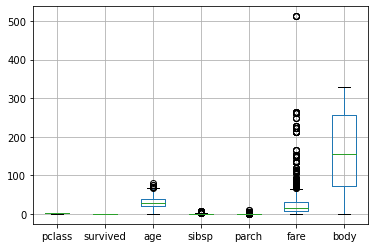

In [11]:
df.boxplot()

생존률을 그래프로 그려보자
- 행과 열방향이 몇 개인지 알자.
- subplot이용

In [12]:
import matplotlib.pyplot as plt #matplotlib라는 폴더 밑에 pylot를 가져와서 plt라고 하겠다.

- df['갯수셀거'].value_counts(): 셀 거 갯수

In [13]:
df['survived'].value_counts()
df['survived']

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64

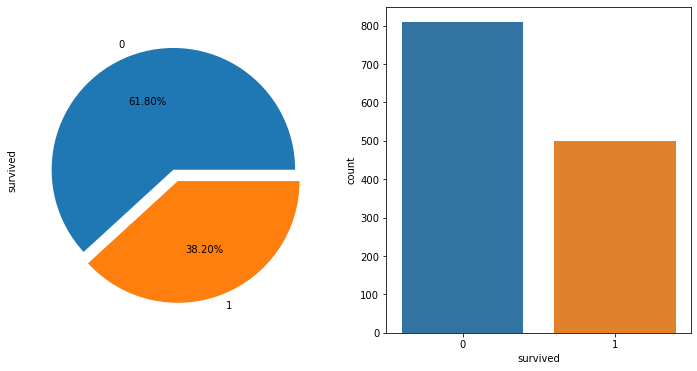

In [14]:
_, ax = plt.subplots(1,2,figsize=(12,6)) #1행2열로 그리고 싶으면, 그림 싸이즈는 12대 6
#ax[0]이 왼쪽에 그려짐, ax[0]는 오른쪽
df['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%.2f%%',ax=ax[0]) #그냥 시각화한거임
#autopct는 소숫점 두자리까지 표시. pie는 파이 형식으로
sns.countplot('survived',data=df,ax=ax[1])

보고서로 쓸거면 더 다양하게

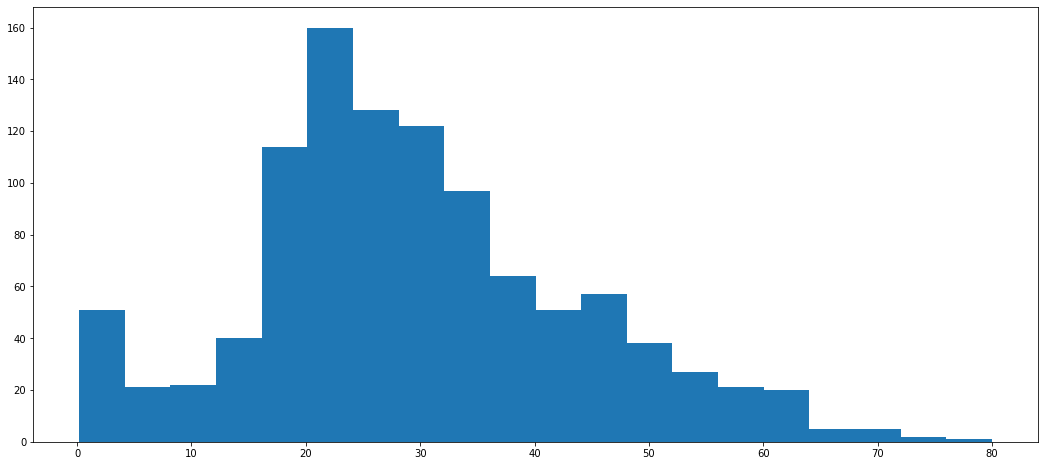

In [15]:
#bins 막대 그래프 갯수, 싸이즈, 기본값은 grid있는데 없앤것
#x축이 나이 y 축이 count 해당되는 나이에 사람이 몇명인지
df['age'].hist(bins=20,figsize=(18,8),grid=False)

In [16]:
#feature를 골라내고 싶어서 첫번째 열을 골라냄
df.groupby('pclass').mean()
#데이터를 보면 pclass는 중요한 feature이구나...뽑아야겠다!

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


### **상관관계**
- df.corr(): 나머지 정보들 사이의 상관관계
- 상관관계: 하나가 올라가면 같이 올라가거나 떨어지는것
- 상관관계 중 어떤 것은 인과관계일 수도 있음. 하지만 아닐수도있으므로 가설을 세워서 통계를 통해 증명

In [17]:
df.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


상관관계에 대한 것을 그래프로 그리기

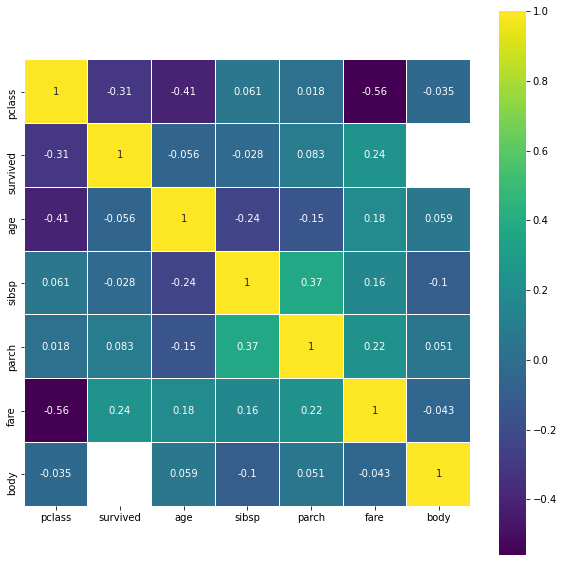

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),linewidths=0.01, square=True,cmap=plt.cm.viridis,linecolor='white',annot=True) 
#인과인지 등등 상관관계
#수치가 높을수록 더 큰 상관관계가 있음. 비례/반비례는 부호를 보면 됨
#흰색 부분은 버리는거임

연령대 별. 새로운  COLUMN을 추가하는 방법

In [19]:
#df['추가하고자하는 행']=식
#파이썬의 pandas를 이용하면 이렇게 간단함
df['age_cat']=pd.cut(df['age'],bins=[0,10,20,50,100],include_lowest=True,labels=['baby','teenage','adult','old'])

In [20]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",adult
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,teenage
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,adult
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,adult


선실등급, 연령대 등에 다라서 생존율에 영향을 미쳤는지 상관관계

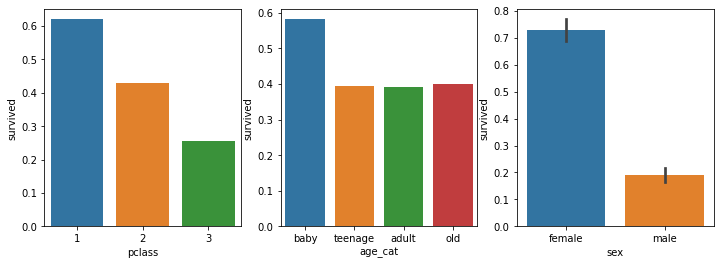

In [21]:
plt.figure(figsize=(12,4))
#죄석에 따라
# barplot: 막대 그래프를 그려주는거
plt.subplot(131) #1-> 1행, 3-> 3열, 1 -> n번째 그림
sns.barplot('pclass','survived',data=df,ci=0) #x축 y축
#나이에 따라
plt.subplot(132)
sns.barplot('age_cat','survived',data=df,ci=0)
#성별에 다라
plt.subplot(133)
sns.barplot('sex','survived',data=df)

### seaborn
**우리가 원하는 바에 해당하는 디자인을 사용하면 됨. 코드 몇줄만 알면 됨**

성별에 따라서 체크

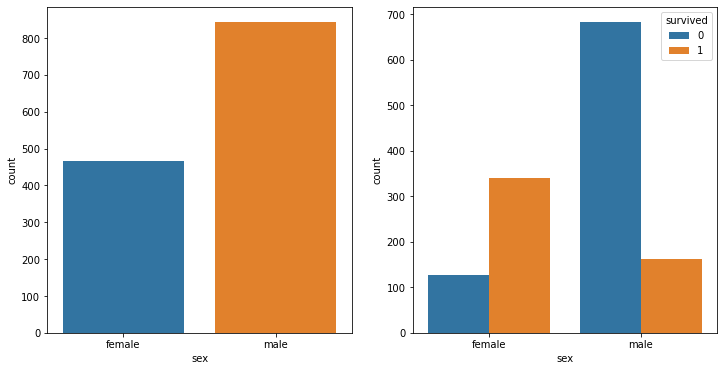

In [22]:
_,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot('sex',data=df,ax=ax[0])
sns.countplot('sex',hue='survived',data=df,ax=ax[1]) #남녀로나누고 생존률에 따라서 나눈다.
#엑샐에서 겨우겨우했던거를 이렇게 쉽게할 수있다니....

### 데이터 정제 과정

머신 러닝은 데이터가 숫자로 되어 있어야 하므로 문자열을 숫자열로 바꾸는 과정을 거쳐야한다

In [23]:
# 여성은 1로 남성을 0으로 대체
tmp=[]
for i in df['sex']:
    if i == 'female':
        tmp.append(1)
    else:
        tmp.append(0)
df['sex']=tmp
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",adult
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,teenage
1305,3,0,"Zabour, Miss. Thamine",1,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,adult
1307,3,0,"Zakarian, Mr. Ortin",0,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,adult


> 결측치인 사람 제외nutnull
- 0은 휴지 심은 있는데 휴지가 없는거고 null은 그냥 없는거임. 결측치
있는 녀석을 살려라

In [24]:
df=df[df['age'].notnull()]


* 알고리즘 보다 중요한 것은 데이터다. 데이터 전처리 과정이 중요하다.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1046 non-null   int64   
 1   survived   1046 non-null   int64   
 2   name       1046 non-null   object  
 3   sex        1046 non-null   int64   
 4   age        1046 non-null   float64 
 5   sibsp      1046 non-null   int64   
 6   parch      1046 non-null   int64   
 7   ticket     1046 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1044 non-null   object  
 11  boat       417 non-null    object  
 12  body       120 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1046 non-null   category
dtypes: category(1), float64(3), int64(5), object(6)
memory usage: 123.8+ KB


In [26]:
#운임 안낸사람 생존
#여기서 선언을 해버려서 빈 셀을 분석하고 있었음
df[df['fare'].isnull()] #is 붙은것은 참 거짓

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
1225,3,0,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S,NaN,261.0,NaN,old


In [27]:
df = df[df['fare'].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   int64   
 1   survived   1045 non-null   int64   
 2   name       1045 non-null   object  
 3   sex        1045 non-null   int64   
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   int64   
 6   parch      1045 non-null   int64   
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
dtypes: category(1), float64(3), int64(5), object(6)
memory usage: 123.7+ KB


In [28]:
#   pclass, sex, age, slisp, parch, fare
#index:0    3    4     5         6   8
X_data=df.values[:, [0,3,4,5,6,8]]
X_data

array([[1, 1, 29.0, 0, 0, 211.3375],
       [1, 0, 0.9167, 1, 2, 151.55],
       [1, 1, 2.0, 1, 2, 151.55],
       ...,
       [3, 0, 26.5, 0, 0, 7.225],
       [3, 0, 27.0, 0, 0, 7.225],
       [3, 0, 29.0, 0, 0, 7.875]], dtype=object)

In [29]:
y_data=df.values[:,[1]] # 1: survived
y_data

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=object)

In [30]:
#데이터를 훈련데이터와 테스트데이터로 쪼개야 함. 
#데이터를 쪼갤 때 섞어줘야하는데 seed의 개념 사용. 고정을 시키면
import random
random.randint(1,100)

23

In [31]:
import random
random.seed(7)
random.randint(1,100)

42

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_data,y_data, test_size=0.1,random_state=7) #테스트가 10퍼센트이므로 훈련데이터는 90퍼센트

In [33]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((940, 6), (940, 1), (105, 6), (105, 1))

재현성dmf 구현하는 방법은 random_state를 하는 것.

In [34]:
X_train[0] #0번째는 3등석 여성 부부 없음

array([3, 1, 45.0, 0, 0, 7.75], dtype=object)

In [35]:
y_train[0]

array([0], dtype=object)

## keras
- 입력되는 것이 있고 출력되는것이 있는데 그 중간 사이의 층에 몇 개의 뉴런을 쓸 것이냐.
- 층과 층사이 넘어갈 때는 relu사용
- 이진분류 이므로 1또는 0
- 마지막 층에서는 뉴련이 1개고 sigmoid라는 함수를 사용. 0.5보다 큰 값이 생존, 작은것이 사망
- 층층히 쌓아두면 정답이 나옴
- 이 구조로 내가 가지고 있는 엑셀 데이터를 분석 가능
- x를 잘 추려내고 정답 y를 잘 계산하면 됨
- 6개의 정보를 가지고 w값을 이용해서 y를 맞추는 것.=> 이걸 인공 신경망이라고 함. 이걸 가능하게 하는 연산이 행렬 곱

In [36]:
#일단 그냥 하고 맞춰보기
import keras
from keras.models import Sequential#뇌, 건물
from keras.layers import Dense #한 층
#분류믄제 일 때 이중분류면 sigmone르 사용
#모델설계: 모델을 몇 층(숨겨진 층.hidden layer으로 쌓을 것인지 알아보기

model=Sequential() #class. 붕어빵을 만드는 붕어빵 틀. 붕어빵을 객체라고 함

Using TensorFlow backend.


> 모델 설계

In [37]:
#몇 개의 층을 쌓을 것이냐에 대한 고민
model.add(Dense(128,input_shape=(6,),activation='relu')) # 층 하나. 입구로 들어오면 조절 필요
#튜플 하나만 있을 떄 컴마/ 괄호 하나만 있으면 숫자
model.add(Dense(128,activation='relu')) #두 번째 층,relu 사용
model.add(Dense(1,activation='sigmoid')) #맨 마지막은 1개라고 했다!0.5 기준으로 판단


> 설정

In [38]:
#관심있는 것을 지정하는 설정. 최적화는 아담. 
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [39]:
%%time
hist = model.fit(X_train,y_train,
                 validation_data=(X_test,y_test),
                 epochs=500)
#훈련하는 공간, 훈련 횟수 500번...500개 정도가 hist에 담긴다.
#정확도가 낮은 것은 데이터가 너무 적어서


Train on 940 samples, validate on 105 samples
Epoch 1/500
940/940 [==============================] - 0s 488us/step - loss: 0.2618 - acc: 0.6234 - val_loss: 0.1969 - val_acc: 0.7524
Epoch 2/500
940/940 [==============================] - 0s 103us/step - loss: 0.2129 - acc: 0.6745 - val_loss: 0.1940 - val_acc: 0.7429
Epoch 3/500
940/940 [==============================] - 0s 45us/step - loss: 0.2236 - acc: 0.6553 - val_loss: 0.1952 - val_acc: 0.7333
Epoch 4/500
940/940 [==============================] - 0s 42us/step - loss: 0.2073 - acc: 0.6957 - val_loss: 0.1997 - val_acc: 0.7524
Epoch 5/500
940/940 [==============================] - 0s 41us/step - loss: 0.1942 - acc: 0.7372 - val_loss: 0.1929 - val_acc: 0.7524
Epoch 6/500
940/940 [==============================] - 0s 41us/step - loss: 0.1934 - acc: 0.7160 - val_loss: 0.1729 - val_acc: 0.7810
Epoch 7/500
940/940 [==============================] - 0s 36us/step - loss: 0.1988 - acc: 0.7160 - val_loss: 0.1699 - val_acc: 0.7905
Epoch 8/500
94

940/940 [==============================] - 0s 37us/step - loss: 0.1336 - acc: 0.8149 - val_loss: 0.1443 - val_acc: 0.8190
Epoch 122/500
940/940 [==============================] - 0s 38us/step - loss: 0.1323 - acc: 0.8106 - val_loss: 0.1415 - val_acc: 0.8190
Epoch 123/500
940/940 [==============================] - 0s 38us/step - loss: 0.1314 - acc: 0.8223 - val_loss: 0.1569 - val_acc: 0.8095
Epoch 124/500
940/940 [==============================] - 0s 38us/step - loss: 0.1280 - acc: 0.8202 - val_loss: 0.1574 - val_acc: 0.7905
Epoch 125/500
940/940 [==============================] - 0s 44us/step - loss: 0.1379 - acc: 0.8160 - val_loss: 0.1693 - val_acc: 0.7810
Epoch 126/500
940/940 [==============================] - 0s 40us/step - loss: 0.1396 - acc: 0.8074 - val_loss: 0.1513 - val_acc: 0.8095
Epoch 127/500
940/940 [==============================] - 0s 41us/step - loss: 0.1302 - acc: 0.8266 - val_loss: 0.1516 - val_acc: 0.8095
Epoch 128/500
940/940 [==============================] - 0s 68

940/940 [==============================] - 0s 39us/step - loss: 0.1198 - acc: 0.8404 - val_loss: 0.1592 - val_acc: 0.7619
Epoch 242/500
940/940 [==============================] - 0s 38us/step - loss: 0.1242 - acc: 0.8362 - val_loss: 0.1536 - val_acc: 0.8190
Epoch 243/500
940/940 [==============================] - 0s 37us/step - loss: 0.1195 - acc: 0.8404 - val_loss: 0.1496 - val_acc: 0.8095
Epoch 244/500
940/940 [==============================] - 0s 38us/step - loss: 0.1200 - acc: 0.8479 - val_loss: 0.1658 - val_acc: 0.8000
Epoch 245/500
940/940 [==============================] - 0s 37us/step - loss: 0.1221 - acc: 0.8362 - val_loss: 0.1494 - val_acc: 0.8286
Epoch 246/500
940/940 [==============================] - 0s 37us/step - loss: 0.1160 - acc: 0.8500 - val_loss: 0.1458 - val_acc: 0.8286
Epoch 247/500
940/940 [==============================] - 0s 37us/step - loss: 0.1181 - acc: 0.8447 - val_loss: 0.1480 - val_acc: 0.8190
Epoch 248/500
940/940 [==============================] - 0s 38

940/940 [==============================] - 0s 38us/step - loss: 0.1081 - acc: 0.8553 - val_loss: 0.1517 - val_acc: 0.8095
Epoch 362/500
940/940 [==============================] - 0s 37us/step - loss: 0.1100 - acc: 0.8564 - val_loss: 0.1555 - val_acc: 0.8095
Epoch 363/500
940/940 [==============================] - 0s 39us/step - loss: 0.1062 - acc: 0.8532 - val_loss: 0.1616 - val_acc: 0.7619
Epoch 364/500
940/940 [==============================] - 0s 37us/step - loss: 0.1063 - acc: 0.8553 - val_loss: 0.1558 - val_acc: 0.7619
Epoch 365/500
940/940 [==============================] - 0s 36us/step - loss: 0.1072 - acc: 0.8521 - val_loss: 0.1517 - val_acc: 0.8095
Epoch 366/500
940/940 [==============================] - 0s 37us/step - loss: 0.1093 - acc: 0.8479 - val_loss: 0.1648 - val_acc: 0.7619
Epoch 367/500
940/940 [==============================] - 0s 37us/step - loss: 0.1115 - acc: 0.8521 - val_loss: 0.1551 - val_acc: 0.7810
Epoch 368/500
940/940 [==============================] - 0s 38

940/940 [==============================] - 0s 40us/step - loss: 0.1007 - acc: 0.8649 - val_loss: 0.1618 - val_acc: 0.7714
Epoch 482/500
940/940 [==============================] - 0s 37us/step - loss: 0.0976 - acc: 0.8723 - val_loss: 0.1636 - val_acc: 0.8000
Epoch 483/500
940/940 [==============================] - 0s 36us/step - loss: 0.0985 - acc: 0.8691 - val_loss: 0.1569 - val_acc: 0.7810
Epoch 484/500
940/940 [==============================] - 0s 37us/step - loss: 0.1025 - acc: 0.8617 - val_loss: 0.1760 - val_acc: 0.7810
Epoch 485/500
940/940 [==============================] - 0s 37us/step - loss: 0.1059 - acc: 0.8553 - val_loss: 0.1592 - val_acc: 0.8000
Epoch 486/500
940/940 [==============================] - 0s 37us/step - loss: 0.1000 - acc: 0.8649 - val_loss: 0.1770 - val_acc: 0.7619
Epoch 487/500
940/940 [==============================] - 0s 37us/step - loss: 0.1033 - acc: 0.8617 - val_loss: 0.1581 - val_acc: 0.8000
Epoch 488/500
940/940 [==============================] - 0s 39

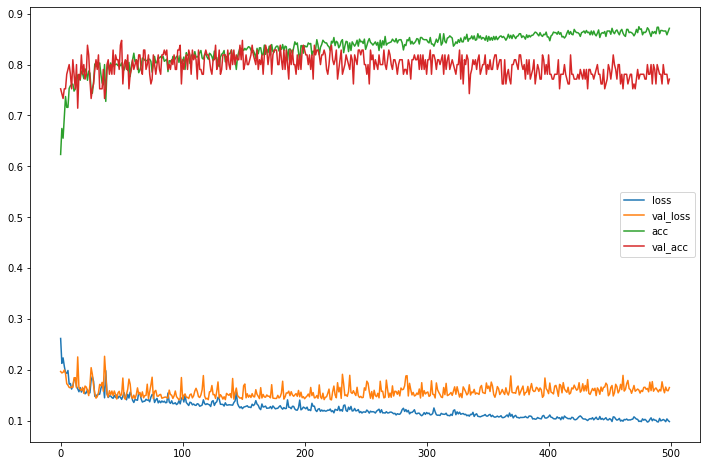

In [40]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) #훈련비용
plt.plot(hist.history['val_loss']) #검증 비용
plt.plot(hist.history['acc'])  #훈련정확도
plt.plot(hist.history['val_acc']) #검증정확도
plt.legend(['loss','val_loss','acc','val_acc'])
plt.show()

## 디카프리오는 살 수 있었나?
### 3등실, 남성:0, 19살, 형제 없고:0, 부모없음:0, 싼 표 5달러


In [41]:
dicaprio=np.array([3,0,19,0,0,5]).reshape(1,6) #2차원 구조로 만듬
model.predict(dicaprio)

#생존 확률 4% 가 왜 안나오냐

array([[0.1683467]], dtype=float32)

## 여주인공 윈슬릿은?
### 1등실, 여성:1, 17살, 형제:1, 부모:2, 비싼표 100달러

In [42]:
winslet=np.array([1,1,17,1,2,100]).reshape(1,6)
model.predict(winslet)

#생존 확률 99.9% 가 왜 안나오냐

array([[0.9999769]], dtype=float32)

## 아나콘다 가상환경 사용법
시작>anaconda3>anaconda prompt>conda create -n tf1 python=3.7 anaconda

### 가상 환경에 keras 설치
conda install keras==2.2.4

## jupyter note book upyter note book 글꼴 설정 등
cmd 검색>명령 프롬프트> mkdir.jupiter



## 과제: 내가 관심있는 데이터를 분석해보기! 나는 그 멕시칸제이 해야지!!!